This assignment is due 5 days after the end of class. 
Section 1: Due Sat 4:00 pm
Section 2: Due M 4:00 pm
Section 3 Due M 12:00 pm

Please submit a zipped file of your Jupyter notebook folder (including any data or images). Use with the following naming convention:
Last_First_Section_Lab.zip
Use the corresponding title for "Lab" in your filename:
FaradayRotation
MagneticMoment
EF-NMR
JohnsonNoise
GammaCoincidence
HallEffect
AnalogComputing
ComptonScattering
OpticalPumping
For example:
Brown_Ethan_Section1_OpticalPumping.zip

Use the same convention for the .ipynb file as well. You also must write this information in a markdown at the top of the Jupyter notebook.

## Introduction:

The Johnson Noise voltage for a given resistor is the variance of the voltage in the resistor when the average value of voltage across the resistor is zero.  In order to observe the Johnson noise of a resistor, the resistor's signal must be amplified. A voltage divider will be used to test this amplification circuit. The gain of the voltage can be controlled by picking specific resistance values for the two resistors.
    
   $$\frac{V_{out}}{V_{in}} = -\frac{R_2}{R_1+R_2}$$
Where $R_2$ is the grounded resistor and $R_1$ is directly connected to the input.
    
The gain from the amplifier can also be controlled by picking good resistors.
    
   $$\frac{V_{out}}{V_{in}} = -\frac{R_f}{R_{in}}$$
Where $R_f$ is connected to the output wire and $R_{in}$ is on the inverting input wire.

The cutoff frequency for a band filter can be controlled by picking good resistors and capacitors. For low-pass filters, any frequency from 0 to the cutoff frequency makes it through, and for high-pass filters, any frequency above the cutoff frequency passes through.
    
   $$f_c = \frac{1}{2\pi RC}$$

The purpose of this lab is to use the voltage variance, resistance, temperature of the room, and the gain as a function of frequency to experimentally determine the Boltzmann constant.
    
   $$<V^2> = 4kTR\int_0^{\infty} g^2(v) dv$$

## Procedure:
- Required Materials:
    - function generator
    - oscilloscope
    - breadboard
    - lead wires
    - resistors
        - $\text{two } 1000\Omega, 1.3\Omega, \text{two } 9\Omega, \text{three } 200\Omega, \text{three } 4200\Omega, 750\Omega, \text{two } 40\Omega, \text{two } 1600\Omega, 10\Omega, 2200\Omega, 6000\Omega, 7500\Omega, 9000\Omega$
    - capacitors
        - $\text{two } 11 nF$
    - jumper wires
    - two operational amplifiers
    - two $9V$ batteries
    - thermometer
    
- Wire a voltage divider such that the input resistor is $1000 \Omega$ and the resistor to ground is $1.3 \Omega$. Give the voltage divider input from a funciton generator.
- Wire two amplifier circuits with op-amps. For the first amplifier circuit, make the input resistor $9 \Omega$ and the feedback resistance two $200 \Omega$ resistors in parallel. For the second amplifier circuit, make the input resistor $9 \Omega$ and the feedback resistance two $4200 \Omega$ resistors in parallel. Take input from the voltage divider.
- Wire a high pass filter and a low pass filter in series such that only frequencies between $5 kHz$ and $20 kHz$ are allowed to pass through both. For the high pass filter, use an $11 nF$ capacitor for the capacitance, and two $1600 \Omega$ resistors and one $40 \Omega$ resistor in series for the resistance. For the low pass filter, use an $11 nF$ capacitor for the capacitance, and a $40 \Omega$ resistor and a $750 \Omega$ resistor in series for the resistance.
- Pick several different input frequencies on the function generator and record the circuit's gain. Pick a starting frequency of $0.4 Hz$ and increment in $0.5 Hz$ intervals, except for in the $5Hz -20Hz$ range where $1 Hz$ intervals is acceptable. 
    - When taking these measurements using the oscilloscope, the display should look something like this:
    ![part1](ALL0008/F0008TEK.jpg)
- Remove the function generator and the voltage divider from the circuit. Replace the voltage divider with a $10 \Omega$ resistor that connects the input of the first op-amp to ground. This will be the resistor that the Johnson noise is measured over. Measure the RMS of the voltage on the oscilloscope to find the variance of the voltage. Make sure to set the time division on the oscilloscope to 0.25 ms/div.
- Repeat the last step with $200 \Omega, 1000 \Omega, 2200 \Omega, 4200 \Omega, 6000 \Omega, 7500 \Omega, \text{ and } 9000 \Omega$ resistors.
    - When measuring the variance in voltage across the resistor, the oscilloscope display should look something like this:
    ![part2](ALL0007/F0007TEK.jpg)
- Record the temperature of the room using a thermometer.

## Analysis

Finished circuit:

![circuit](circuit.jpg)

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from IPython.display import HTML, display
import scipy.odr as odr
import matplotlib.patches as mpatches

In [74]:
def linear(param,x):
    return param[0]*x + param[1]

def calc_area(x_values,y_values,dx_values,dy_values):
    # calculates the area under the curve using the trapezoidal method
    area = 0
    da = 0
    for i in range(0,len(x_values)-1):
        area_term = 0.5*(y_values[i]**2 + y_values[i+1]**2)*(x_values[i+1] - x_values[i])
        area += area_term
        da += area_term*(( (2*y_values[i]*dy_values[i] + 2*y_values[i+1]*dy_values[i+1])/(y_values[i]**2 + y_values[i+1]**2) )+( (dx_values[i]+dx_values[i+1])/(x_values[i+1]-x_values[i]) ))
    return (area,da)

def calc_k_unc(k,slope,d_slope,integral,d_integral,T,dt):
    # calculates uncertainty in Boltzmann Constant using mult/div error propogation
    slope_term = d_slope/slope
    int_term = d_integral/integral
    T_term = dt/T
    return k*(slope_term+int_term+T_term)

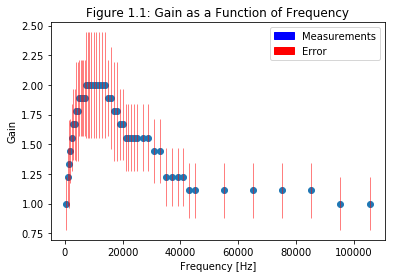

Area under the curve: 190000 Hz ± 77000 Hz


In [75]:
error_freq = 1
v_in = 0.9
dv_in = 0.1

freq = np.array([402,1001,1500,2002,2499,2998,3499,3998,4499,4999,5495,5995,6505,7010,7510,8015,8505,9005,10000,11000,12000,13000,14000,15000,16040,17010,18030,19000,20000,21030,22010,23000,24010,25010,27000,28930,31015,32985,34980,37020,39025,41000,43060,45025,55025,65050,75050,85150,95000,105550])

v_out = np.array([0.9,1.1,1.2,1.3,1.4,1.5,1.5,1.6,1.6,1.7,1.7,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7,1.6,1.6,1.5,1.5,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.3,1.3,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9])
dv_out = np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
gain = v_out/v_in
d_gain = gain*((dv_out/v_out)+(dv_in/v_in))

plt.scatter(freq,gain)
plt.errorbar(freq,gain,yerr=d_gain,xerr=error_freq,fmt="none",color='red',elinewidth=0.5,linewidth=0,marker = '.',
             markersize = 10,label = 'Uncertainty')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.title('Figure 1.1: Gain as a Function of Frequency')

d_freq = [error_freq]*len(d_gain)
(area,da) = calc_area(freq,gain,d_freq,d_gain)

blue_patch = mpatches.Patch(color='blue', label='Measurements')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch,red_patch])

plt.show()

print("Area under the curve: " + str(int(round(area,-4))) + " Hz \u00B1 " + str(int(round(da,-3))) + " Hz")

Beta: [4.42444132e-11 3.56178344e-07]
Beta Std Error: [3.32954323e-12 1.65190974e-08]
Beta Covariance: [[ 4.93549226e-22 -1.86188365e-18]
 [-1.86188365e-18  1.21488112e-14]]
Residual Variance: 0.02246150446973491
Inverse Condition #: 0.0001309083819470196
Reason(s) for Halting:
  Sum of squares convergence


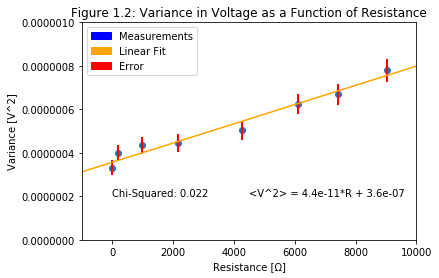

Resistance [Ω],Variance [μV^2]
11 ± 2,0.3 ± 0.03
198 ± 2,0.4 ± 0.04
984 ± 2,0.4 ± 0.04
2184 ± 2,0.4 ± 0.04
6107 ± 2,0.6 ± 0.05
7410 ± 2,0.7 ± 0.05
9030 ± 2,0.8 ± 0.05
4255 ± 2,0.5 ± 0.04


Slope [V^2/Ω],Uncertainty in Slope [V^2/Ω],Y-intercept [V^2],Uncertainty in Y-intercept [V^2]
4.4e-11,3.3e-12,3.6e-07,1.7e-08


Boltzmann Constant: k = 2e-19 J/K ± 1e-19 J/K


In [82]:
resistance = np.array([11,198.5,984,2184,6107,7410,9030,4255])
d_resist = 2

rms = np.array([576,631,659,667,790,818,883,709])
d_rms = 30
variance = (rms*pow(10,-6))**2
d_variance = 2*(rms*pow(10,-6))*(d_rms*pow(10,-6))

temperature = 19+273.15
temp_unc = 0.5

plt.scatter(resistance,variance)
plt.errorbar(resistance,variance,yerr=d_variance,xerr=d_resist,fmt="none",color='red',elinewidth=2,linewidth=0,marker = '.',
             markersize = 10,label = 'Background Noise')
plt.xlabel('Resistance [\u03A9]')
plt.ylabel('Variance [V^2]')
plt.title('Figure 1.2: Variance in Voltage as a Function of Resistance')

linear_fit = odr.Model(linear)          
my_data = odr.RealData(resistance, variance, sx = np.std(resistance), sy = np.std(variance))  
regressed_model = odr.ODR(my_data,linear_fit,beta0=[1,1])  
regressed_output = regressed_model.run() 
regressed_output.pprint()  

X = np.linspace(-1000,10000,20)

fitted_params = regressed_output.beta    
param_sd = regressed_output.sd_beta    
chi_squared = str(round(regressed_output.res_var,3))  
fitted_curve = linear(fitted_params,X) 

slope = fitted_params[0]
slope_error = param_sd[0]
y_intercept = fitted_params[1]
dy_intercept = param_sd[1]
k = slope/(4*temperature*area)
k_unc = calc_k_unc(k,slope,slope_error,area,da,temperature,temp_unc)

x = np.linspace(-900,10000,10)
y_intercept = fitted_params[1]
plt.plot(X, fitted_curve, color='orange')
plt.text(0,0.0000002,s='Chi-Squared: ' + chi_squared)
plt.text(4500,0.0000002,s='<V^2> = {}*R + {}'.format(round(slope,12),round(y_intercept,8)))
plt.xlim(-1000,10000)
plt.ylim(0,1e-06)

blue_patch = mpatches.Patch(color='blue', label='Measurements')
orange_patch = mpatches.Patch(color='orange', label='Linear Fit')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch,orange_patch,red_patch])

plt.show()

table_data = [['Resistance [\u03A9]','Variance [\u03BCV^2]']]
for i in range(0,len(resistance)):
    table_data.append(["{} \u00B1 {}".format(int(resistance[i]),d_resist),"{:.1f} \u00B1 {:.2f}".format(variance[i]*pow(10,6),d_variance[i]*pow(10,6))])

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table_data)
        )
))

table_fit_data = [['Slope [V^2/\u03A9]','Uncertainty in Slope [V^2/\u03A9]','Y-intercept [V^2]','Uncertainty in Y-intercept [V^2]'],[round(slope,12),round(slope_error,13),round(y_intercept,8),round(dy_intercept,9)]]
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table_fit_data)
        )
))

print('Boltzmann Constant: k = {} J/K \u00B1 {} J/K'.format(round(k,20),round(k_unc,21)))

In order to find the Boltzmann constant, I used the formula for variance in voltage I put in the introduction.
    
   $$<V^2> = 4kTR\int_0^{\infty} g^2(v) dv$$
  
I found variance in voltage for each Johnson-Noise resistor by using an oscilloscope to measure the RMS of the voltage and then I squared the RMS to obtain the variance for a particular resistor. I found the integral of the gain squared as a function of frequency by taking measurements of gain for many different frequencies and then plotting these data points. The area under the curve squared was approximated by finding the areas of trapezoids under the curve sqaured such that there is a trapezoid for every pair of adjacent data points. The gains squared of two adjacent data points are the "bases" of a trapezoid and the difference in frequency between the two points is the "height" of a trapezoid. The sum of the areas of these trapezoids is the area under the curve squared.  From here, I solved for the Boltzmann constant by saying variance divided by resistance was the slope of Figure 1.2 and then plugging in all the other values I knew for measurements. I discuss how I found the uncertainties in my measurements in Error Analysis.

Error Analysis:
    
To find the uncertainty in my integral calculation for gain squared as a function of frequency, I took the sum of the uncertainties of each trapezoid's area. To find the uncertainty in area of a single trapezoid, I used the formula for multiplying uncertain values where the two uncertain values were the sum of the bases and the height of the trapezoid.

$$da = a*(\frac{2*(g_{i+1}*dg_{i+1} + g_i*dg_i)}{g_{i+1}^2 + g_i^2}+\frac{df}{f_{i+1}-f_i})$$

In this formula for uncertainty in area of a trapezoid, $da$ is the uncertainty in the area of a trapezoid, $a$ is the area of a trapezoid, $g_i$ is the gain of the $i$th data point, $dg_i$ is the uncertainty of the gain of the $i$th data point, $f$ is the frequency of the $i$th data point, and $df_i$ is the uncertainty in frequency of the $i$th data point.

With the uncertainty in the intergral of the gain squared, I was able to calculate the uncertainty in the Boltzmann Constant I found experimentally by using the formula for multiplying/dividing uncertain values. 

$$dk = k*(\frac{dS}{S}+\frac{dI}{I}+\frac{dT}{T})$$

In this formula, $dk$ is the uncertainty in the Boltzmann constant, $dS$ is the uncertainty in the slope of the linear fit in Figure 1.2 (which was found using ODR), $S$ is the slope of the linear fit in Figure 1.2 (again, this was found using ODR), $dI$ is the uncertainty in the integral with repsect to frequency of the gain squared, and $I$ is the integral with repsect to frequency of the gain squared.

The uncertainty in the Boltzmann constant is not big enough to encompass the theoretical Boltzmann Constant, and this was most likely due to systematic error in measuring the variance in voltage. The chi-squared value of the linear fit in Figure 1.2 is too small to be acceptable, which means the uncertainty in variance is too large to be acceptable. The large uncertainty in variance was caused by having a bad time scale setting on the oscilloscope. 

## Conclusion:

| k from data                                             | k from theory               |
|---------------------------------------------------------|:---------------------------:|
| $2*10^{-19} \text{ J/K} \pm 1*10^{-19} \text { J/K}$    | $1.38*10^{-23} \text{ J/K}$ |
|                                                         |                             |

As expected from theory, the Boltzmann constant I determined experimentally is a very small positive number. However, my experimentally determined Boltzmann constant is larger than the theoretical Boltzmann constant by four orders of magnitude. In order to obtain a more acceptable value of the Boltzmann constant if I performed this experiment again, I would make sure the time scale setting on the oscilloscope was correct so that I would not have such a large uncertainty in the variance in voltage of each Johnson-noise resistor.